<a href="https://colab.research.google.com/github/jemaaku96/deeplearning/blob/main/Synthetic_Data_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Datasets
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformity distributed between (-3, 3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

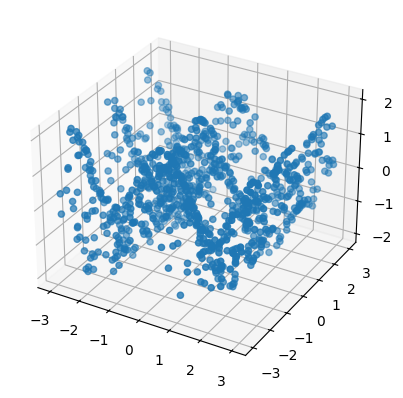

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], Y)


In [5]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape = (2,), activation = 'relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer = opt, loss = "mse")
r = model.fit(X, Y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9983   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8754  
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9004 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8939
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7846 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7903 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7131 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6911 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6335 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5923 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5544 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5262 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5096 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5302 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

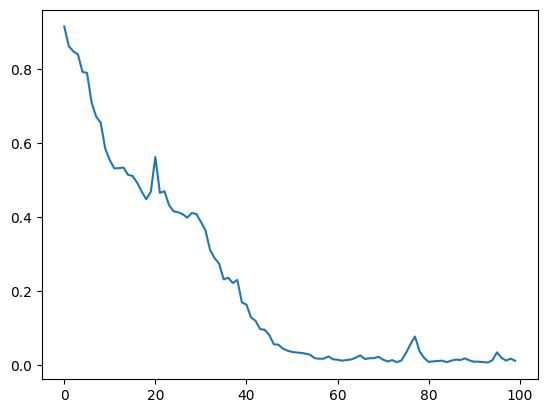

In [8]:
plt.plot(r.history["loss"], label = "loss");

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


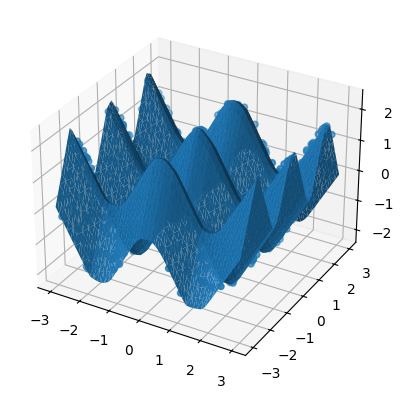

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], Y)

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth = 0.2, antialiased = True)
plt.show()

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


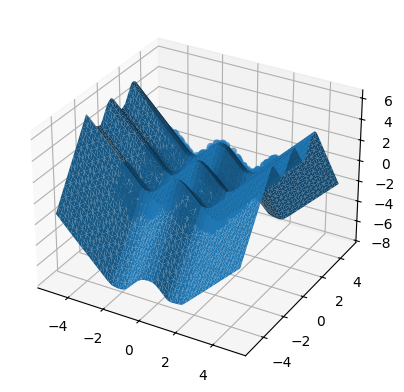

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:, 0], X[:, 1], Y)

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth = 0.2, antialiased = True)
plt.show()